## **TechHub end-to-end data analytics project**
### **PART 1. ETL (Extract, Transform, Load)**

In the first part of the project, I will perform ETL (Extract, Transform, Load), a data engineering process that involves collecting data from sources (Extract), cleaning, structuring, and modifying data (Transform), and storing it in a target repository such as a database or data warehouse (Load).

The goal is to ensure that TechHub's sales data is cleaned, normalized, and well-structured before being imported into the database, ensuring efficient data storage and reliable data for later analysis tasks.

The data currently consists of 16 columns, as described below

| Column Name         | Description                                                                 |
|---------------------|-----------------------------------------------------------------------------|
| Unnamed: 0          | Index column, not part of the data.                                          |
| Order ID            | Unique identifier for each order.                                            |
| Product             | Name of the product ordered.                                                 |
| Quantity Ordered    | The number of units of the product ordered.                                  |
| Cost Each           | The cost price per unit of the product.                                      |
| Price Each          | The selling price per unit of the product.                                   |
| Sales               | The total sales value (Price Each * Quantity Ordered).                       |
| Order Date          | The date and time when the order was placed.                                 |
| Month               | The month (numerically) when the order was placed.                           |
| Hour                | The hour (numerically) when the order was placed.                            |
| Customer ID         | Unique identifier for the customer who placed the order.                    |
| Name                | Full name of the customer who placed the order.                             |
| Gender              | Gender of the customer.                                                     |
| Phone               | Contact phone number of the customer.                                        |
| City                | City where the customer resides.                                            |
| Address             | Full address of the customer, including street and postal code.              |


#### **I. Data extracting and cleaning**

I will first import the pandas library and load the CSV file into a DataFrame and have some initial look at it.

In [ ]:
import pandas as pd
pd.set_option('display.max_rows', None, 'display.max_columns', None, 'display.width', None) 

# Load the CSV file into a Pandas DataFrame
sales = pd.read_csv("C:/Users/admin/Downloads/TechHub project/TechHub_Sales.csv")

In [ ]:
# Display the first 5 rows of the dataframe
print("Dataframe's shape:")
sales.shape
print("\nFirst 5 Rows:")
sales.head()


First 5 Rows:


,Unnamed: 0,Order ID,Product,Quantity Ordered,Cost Each,Price Each,Sales,Order Date,Month,Hour,Customer ID,Name,Gender,Phone,City,Address
0,0,295665,Macbook Pro Laptop,1,1301.02,2550.00,2550.00,30/12/2023 00:01,12,0,770487,Allison Hill,Female,+61 41125 859 381,Brisbane,"521 Regent St, Brisbane QLD 4000"
1,1,295666,LG Washing Machine,1,459.18,900.00,900.00,29/12/2023 07:03,12,7,356787,Angie Henderson,Female,+61 43242 854 204,Brisbane,"866 Kedron Park Rd, Kedron QLD 4031"
2,2,295667,USB-C Charging Cable,1,9.15,17.92,17.92,12/12/2023 18:21,12,18,809570,Cristian Santos,Male,+61 48189 704 532,Brisbane,"74 Market St, Brisbane QLD 4000"
3,3,295668,27in FHD Monitor,1,114.79,224.99,224.99,22/12/2023 15:13,12,15,133326,Abigail Shaffer,Female,+61 40195 323 338,Sydney,"455 Pacific Hwy, Chatswood NSW 2067"
4,4,295669,USB-C Charging Cable,1,9.15,17.92,17.92,18/12/2023 12:38,12,12,629903,Gabrielle Davis,Female,+61 49127 674 303,Hobart,"949 Mistral Pl, Hobart TAS 7000"


We can see that the columns in this dataset can be divided into 5 groups: Orders (Order ID, Sales), Product (Product, Quantity Ordered, Cost Each, Price Each), Date (Order Date, Month, Hour), Customer (Customer ID, Name, Gender, Phone), and Location (City). However, to import this data into MySQL, it needs to be normalized into different tables. Each table will represent a particular type of entity and be connected to each other using primary keys and foreign keys. This relational structure will ensure data consistency and optimize query efficiency, rather than searching through a large CSV file.

Below is the expected schema after the process:

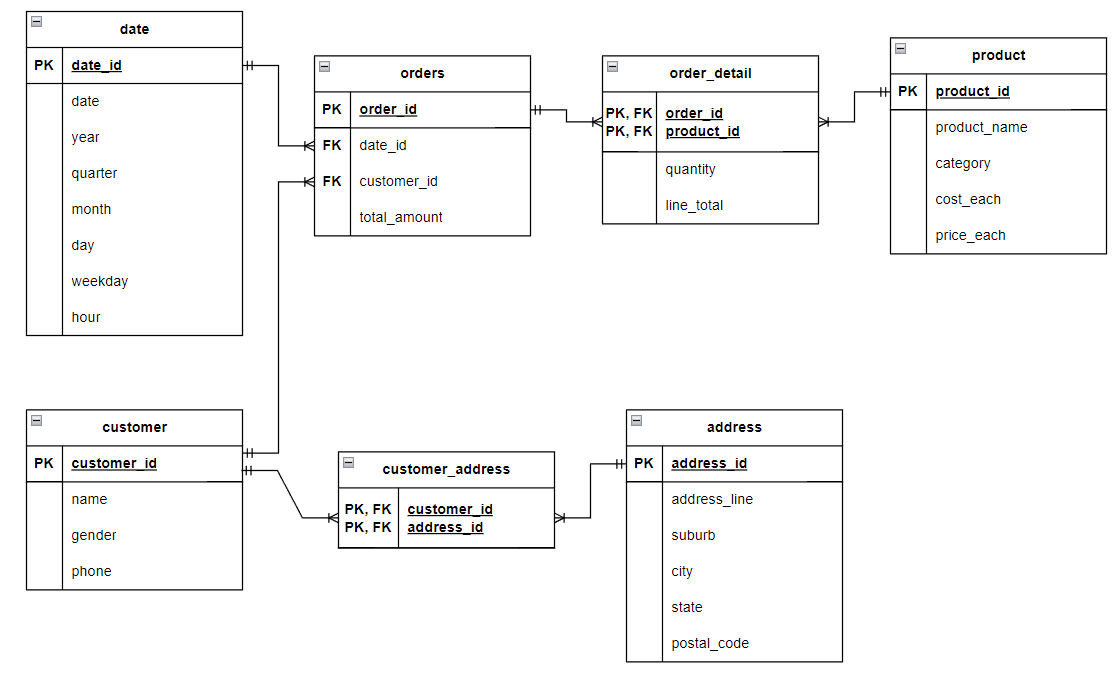

Before splitting the data into multiple tables, we need to perform further inspections, cleaning, and create any necessary new columns.

In [ ]:
# Display basic info about the dataset
print("Dataset Info:")
sales.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        185950 non-null  int64  
 1   Order ID          185950 non-null  int64  
 2   Product           185950 non-null  object 
 3   Quantity Ordered  185950 non-null  int64  
 4   Cost Each         185950 non-null  float64
 5   Price Each        185950 non-null  float64
 6   Sales             185950 non-null  float64
 7   Order Date        185950 non-null  object 
 8   Month             185950 non-null  int64  
 9   Hour              185950 non-null  int64  
 10  Customer ID       185950 non-null  int64  
 11  Name              185950 non-null  object 
 12  Gender            185950 non-null  object 
 13  Phone             185950 non-null  object 
 14  City              185950 non-null  object 
 15  Address           185950 non-null  object 
dtypes: flo

All columns have the correct data types except for Order Date, which includes time. Since we already have an Hour column and don't need minutes, we'll remove the time and convert Order Date to the correct data type.

In [ ]:
# Convert 'Order Date' to datetime format and remove time
sales["Order Date"] = pd.to_datetime(sales["Order Date"], format="%d/%m/%Y %H:%M", errors="coerce").dt.date

# Convert back to datetime64[ns] for proper SQL compatibility
sales["Order Date"] = pd.to_datetime(sales["Order Date"])

# Confirm changes
print("\n✅ Order Date successfully converted to DATE type time!")
print(sales.dtypes)


✅ Order Date successfully converted to DATE type time!
Unnamed: 0                   int64
Order ID                     int64
Product                     object
Quantity Ordered             int64
Cost Each                  float64
Price Each                 float64
Sales                      float64
Order Date          datetime64[ns]
Month                        int64
Hour                         int64
Customer ID                  int64
Name                        object
Gender                      object
Phone                       object
City                        object
Address                     object
dtype: object


Next I will look at some descriptive statistics of numerical values in the dataset

In [ ]:
# Showing descriptive statisitcs of numerical columns
print('Descriptive statisitcs of numerical columns:')
sales.describe()

Descriptive statisitcs of numerical columns:


,Unnamed: 0,Order ID,Quantity Ordered,Cost Each,Price Each,Sales,Order Date,Month,Hour,Customer ID
count,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950,185950.000000,185950.000000,185950.000000
mean,8340.388475,230417.569379,1.124329,141.123294,276.598656,278.235406,2023-07-18 07:00:22.109169152,7.059140,14.413305,550589.107534
min,0.000000,141234.000000,-1.000000,2.290000,4.490000,4.490000,2023-01-01 00:00:00,1.000000,0.000000,100010.000000
25%,3894.000000,185831.250000,1.000000,9.150000,17.920000,17.920000,2023-04-16 00:00:00,4.000000,11.000000,326417.000000
50%,7786.000000,230367.500000,1.000000,11.440000,22.420000,22.420000,2023-07-17 00:00:00,7.000000,15.000000,550353.000000
75%,11872.000000,275035.750000,1.000000,114.800000,225.000000,225.000000,2023-10-26 00:00:00,10.000000,19.000000,775910.000000
max,25116.000000,319670.000000,9.000000,1301.020000,2550.000000,5100.000000,2024-01-01 00:00:00,12.000000,23.000000,999999.000000
std,5450.554093,51512.737110,0.442929,254.640305,499.098125,499.380806,NaN,3.502996,5.423416,259712.441256


Most column values are normal, except for Quantity Ordered, which has a minimum value of -1. We will inspect the rows with this negative value.

In [ ]:
# Displaying rows with -1 value in quantity ordered
sales[sales['Quantity Ordered'] == -1]

,Unnamed: 0,Order ID,Product,Quantity Ordered,Cost Each,Price Each,Sales,Order Date,Month,Hour,Customer ID,Name,Gender,Phone,City,Address
270,272,295918,AA Batteries (4-pack),-1,2.94,5.76,5.76,2023-12-10,12,7,839677,Chloe Tran,Female,+61 44525 954 594,Brisbane,"863 Boundary St, Spring Hill QLD 4000"
59373,4131,165935,Apple Airpods Headphones,-1,114.80,225.00,225.00,2023-03-11,3,17,608741,Richard Benton,Male,+61 40901 736 463,Hobart,"487 Jennings Ln, Hobart TAS 7000"
106141,7248,285728,Lightning Charging Cable,-1,11.44,22.42,22.42,2023-11-18,11,13,121789,Teresa Nixon,Female,+61 43319 205 353,Perth,"732 Karrinyup Rd, Karrinyup WA 6018"
106253,7360,285835,AAA Batteries (4-pack),-1,2.29,4.49,4.49,2023-11-19,11,13,329993,Lisa Ross,Female,+61 40732 684 748,Gold Coast,"953 Hope Island Rd, Hope Island QLD 4212"
106436,7543,286012,Bose SoundSport Headphones,-1,76.52,149.98,149.98,2023-11-29,11,22,508960,Andrew Burch PhD,Male,+61 40605 786 299,Brisbane,"495 Compton Rd, Sunnybank Hills QLD 4109"


There are 5 rows with negative Quantity Ordered values. Based on the price and sales, these should be 1. I will update the Quantity Ordered to 1 for these rows.

In [ ]:
# Replace negative values in 'Quantity Ordered' with 1
sales.loc[sales["Quantity Ordered"] < 0, "Quantity Ordered"] = 1
# Checking if there is any rows with -1 left
sales[sales['Quantity Ordered'] == -1]

,Unnamed: 0,Order ID,Product,Quantity Ordered,Cost Each,Price Each,Sales,Order Date,Month,Hour,Customer ID,Name,Gender,Phone,City,Address


I will then inspect unique values in key columns for verification 

In [ ]:
# Identify unique values in key columns for verification

print("\nUnique Customer IDs:")
print(sales["Customer ID"].nunique())

print("\nUnique Genders:")
print(sales["Gender"].unique())

print("\nUnique Cities:")
print(sales["City"].unique())

print("\nUnique Products:")
print(sales["Product"].unique())


Unique Customer IDs:
140787

Unique Genders:
['Female' 'Male']

Unique Cities:
[' Brisbane' ' Sydney' ' Hobart' ' Canberra' ' Gold Coast' ' Melbourne'
 ' Adelaide' ' Newcastle' ' Perth']

Unique Products:
['Macbook Pro Laptop' 'LG Washing Machine' 'USB-C Charging Cable'
 '27in FHD Monitor' 'AA Batteries (4-pack)' 'Bose SoundSport Headphones'
 'AAA Batteries (4-pack)' 'ThinkPad Laptop' 'Lightning Charging Cable'
 'Google Phone' 'Wired Headphones' 'Apple Airpods Headphones'
 'Vareebadd Phone' 'iPhone' '20in Monitor' '34in Ultrawide Monitor'
 'Flatscreen TV' '27in 4K Gaming Monitor' 'LG Dryer']


The dataset has 140,787 customers, which is correct. The values in the Gender and Product columns are accurate with no typos. However, the City column contains leading spaces that need to be corrected.

In [ ]:
# Handle leading spaces in city names
sales["City"] = sales["City"].str.strip()

# Check the values after trimming
print(sales["City"].unique())

['Brisbane' 'Sydney' 'Hobart' 'Canberra' 'Gold Coast' 'Melbourne'
 'Adelaide' 'Newcastle' 'Perth']


Next, I will drop unnecessary columns and create new ones before splitting the table. The 'Unnamed: 0' column is not needed in the planned schema, so we will drop it.

In [ ]:
# Dropping 'Unnamed: 0' column
sales.drop(columns=["Unnamed: 0"], inplace=True)

For products, I will assign IDs in the format TH-XXX and categorize them.

In [ ]:
# Define product categories
product_categories = {
    "Macbook Pro Laptop": "Laptops",
    "ThinkPad Laptop": "Laptops",
    "Google Phone": "Smartphones",
    "Vareebadd Phone": "Smartphones",
    "iPhone": "Smartphones",
    "LG Washing Machine": "Home Appliances",
    "LG Dryer": "Home Appliances",
    "Flatscreen TV": "TV & Monitors",
    "20in Monitor": "TV & Monitors",
    "27in FHD Monitor": "TV & Monitors",
    "27in 4K Gaming Monitor": "TV & Monitors",
    "34in Ultrawide Monitor": "TV & Monitors",
    "USB-C Charging Cable": "Accessories",
    "Lightning Charging Cable": "Accessories",
    "AA Batteries (4-pack)": "Accessories",
    "AAA Batteries (4-pack)": "Accessories",
    "Wired Headphones": "Headphones",
    "Bose SoundSport Headphones": "Headphones",
    "Apple Airpods Headphones": "Headphones"
}

# Assign product IDs in the format 'TH-XXX'
unique_products = sales["Product"].unique()
product_id_mapping = {product: f"TH-{str(idx+1).zfill(3)}" for idx, product in enumerate(unique_products)}

# Create new columns
sales["Product ID"] = sales["Product"].map(product_id_mapping)
sales["Category"] = sales["Product"].map(product_categories)

# Display first few rows to confirm changes
sales[["Product", "Product ID", "Category"]].head()

,Product,Product ID,Category
0,Macbook Pro Laptop,TH-001,Laptops
1,LG Washing Machine,TH-002,Home Appliances
2,USB-C Charging Cable,TH-003,Accessories
3,27in FHD Monitor,TH-004,TV & Monitors
4,USB-C Charging Cable,TH-003,Accessories


For time, we need new columns for Year, Quarter, Day and week day.

In [ ]:
# Extract time-related components
sales["Year"] = sales["Order Date"].dt.year
sales["Quarter"] = sales["Order Date"].dt.quarter
sales["Day"] = sales["Order Date"].dt.day
sales["Weekday"] = sales["Order Date"].dt.day_name()

# Display first few rows to confirm changes
sales[["Order Date", "Year", "Month", "Day", "Quarter", "Weekday"]].head()

,Order Date,Year,Month,Day,Quarter,Weekday
0,2023-12-30,2023,12,30,4,Saturday
1,2023-12-29,2023,12,29,4,Friday
2,2023-12-12,2023,12,12,4,Tuesday
3,2023-12-22,2023,12,22,4,Friday
4,2023-12-18,2023,12,18,4,Monday


We will also assign a unique date_id for each date-hour pair, which will serve as the primary key for the date table

In [ ]:
sales = sales.sort_values(by=["Order Date", "Hour"]).reset_index(drop=True)

# Generate unique date_id for each (Order Date, Hour) pair
date_map = sales[["Order Date", "Hour"]].drop_duplicates().reset_index(drop=True)
date_map.insert(0, "date_id", range(1, len(date_map) + 1))

# Merge back to the sales DataFrame
sales = sales.merge(date_map, on=["Order Date", "Hour"], how="left")

For the address table, we will create a unique address_id for each customer ID and address pair.

In [ ]:
# Generate unique address_id for each unique (customer_id, Address) pair
address_map = sales[["Customer ID", "Address"]].drop_duplicates().reset_index(drop=True)
address_map.insert(0, "address_id", range(1, len(address_map) + 1))

# Merge back to the main DataFrame
sales = sales.merge(address_map, on=["Customer ID", "Address"], how="left")

# Check the dataframe after creating new columns 
sales.head()

,Order ID,Product,Quantity Ordered,Cost Each,Price Each,Sales,Order Date,Month,Hour,Customer ID,Name,Gender,Phone,City,Address,Product ID,Category,Year,Quarter,Day,Weekday,date_id,address_id
0,147268,Wired Headphones,1,9.18,17.98,17.98,2023-01-01,1,3,629341,Jessica Diaz,Female,+61 49610 494 102,Brisbane,"803 Sackville St, Brisbane QLD 4000",TH-011,Headphones,2023,1,1,Sunday,1,1
1,148041,USB-C Charging Cable,1,9.15,17.92,17.92,2023-01-01,1,3,663444,Jamie Spencer,Female,+61 47753 630 829,Sydney,"414 Epping Rd, North Ryde NSW 2113",TH-003,Accessories,2023,1,1,Sunday,1,2
2,149343,Apple Airpods Headphones,1,114.80,225.00,225.00,2023-01-01,1,4,161389,Meagan Johnson,Female,+61 46151 888 548,Brisbane,"421 Boundary St, Spring Hill QLD 4000",TH-012,Headphones,2023,1,1,Sunday,2,3
3,149964,AAA Batteries (4-pack),1,2.29,4.49,4.49,2023-01-01,1,5,483704,Amanda Harris,Female,+61 43345 570 476,Gold Coast,"550 Amity Rd, Coomera QLD 4209",TH-007,Accessories,2023,1,1,Sunday,3,4
4,141732,iPhone,1,535.71,1050.00,1050.00,2023-01-01,1,6,734258,Kayla Stevens,Female,+61 45384 439 157,Hobart,"678 Market Pl, Hobart TAS 7000",TH-014,Smartphones,2023,1,1,Sunday,4,5


#### **II. Spliting table**

Now, we will split the current dataframe into 8 dataframes, as shown in the ERD, before importing them into the MySQL database.

In [19]:
# Create Orders Table
orders = sales.groupby("Order ID").agg(
    date_id=("date_id", "first"),
    customer_id=("Customer ID", "first"),
    total_amount=("Sales", "sum")
).reset_index()
orders.rename(columns={"Order ID": "order_id"}, inplace=True)
orders = orders.sort_values(by=["date_id", "order_id"]).reset_index(drop=True)

# Check the table after creating
orders.head()

,order_id,date_id,customer_id,total_amount
0,147268,1,629341,17.98
1,148041,1,663444,17.92
2,149343,2,161389,225.00
3,149964,3,483704,4.49
4,141732,4,734258,1050.00


In [22]:
# Create Order detail table
order_detail = sales[["Order ID", "Product ID", "Quantity Ordered", "Sales"]].groupby(["Order ID", "Product ID"], as_index=False).agg({
    "Quantity Ordered" : "sum",
    "Sales" : "sum"
})
order_detail.rename(columns={
    "Order ID": "order_id",
    "Product ID": "product_id",
    "Quantity Ordered": "quantity",
    "Sales": "line_total"
}, inplace=True)
order_detail = order_detail.sort_values(by=["order_id", "product_id"]).reset_index(drop=True)

# Check the table after creating
order_detail.head()

,order_id,product_id,quantity,line_total
0,141234,TH-014,1,1050.00
1,141235,TH-009,1,22.42
2,141236,TH-011,2,35.97
3,141237,TH-004,1,224.99
4,141238,TH-011,1,17.98


In [24]:
# Create Product Table
product = sales[["Product ID", "Product", "Category", "Cost Each", "Price Each"]].drop_duplicates().copy()
product.rename(columns={
    "Product ID": "product_id",
    "Product": "product_name",
    "Category": "category",
    "Cost Each": "cost_each",
    "Price Each": "price_each"
}, inplace=True)
product = product.sort_values(by=["product_id"]).reset_index(drop=True)

# Check the table after creating
product

,product_id,product_name,category,cost_each,price_each
0,TH-001,Macbook Pro Laptop,Laptops,1301.02,2550.00
1,TH-002,LG Washing Machine,Home Appliances,459.18,900.00
2,TH-003,USB-C Charging Cable,Accessories,9.15,17.92
3,TH-004,27in FHD Monitor,TV & Monitors,114.79,224.99
4,TH-005,AA Batteries (4-pack),Accessories,2.94,5.76
5,TH-006,Bose SoundSport Headphones,Headphones,76.52,149.98
6,TH-007,AAA Batteries (4-pack),Accessories,2.29,4.49
7,TH-008,ThinkPad Laptop,Laptops,765.30,1499.99
8,TH-009,Lightning Charging Cable,Accessories,11.44,22.42
9,TH-010,Google Phone,Smartphones,459.18,900.00


In [25]:
# Create Date Table
date = sales[["date_id", "Order Date", "Year", "Quarter", "Month", "Day", "Weekday", "Hour"]].drop_duplicates().copy()
date.rename(columns={"Order Date": "date"}, inplace=True)

# Check the table after creating 
date.head()

,date_id,date,Year,Quarter,Month,Day,Weekday,Hour
0,1,2023-01-01,2023,1,1,1,Sunday,3
2,2,2023-01-01,2023,1,1,1,Sunday,4
3,3,2023-01-01,2023,1,1,1,Sunday,5
4,4,2023-01-01,2023,1,1,1,Sunday,6
8,5,2023-01-01,2023,1,1,1,Sunday,7


In [26]:
# Create Customer Table
customer = sales[["Customer ID", "Name", "Gender", "Phone"]].drop_duplicates().copy()
customer.rename(columns={
    "Customer ID": "customer_id",
    "Name": "name",
    "Gender": "gender",
    "Phone": "phone"
}, inplace=True)
customer = customer.sort_values(by=["customer_id"]).reset_index(drop=True)

# Check the table after creating
customer.head()

,customer_id,name,gender,phone
0,100010,Daniel Turner,Male,+61 48415 696 672
1,100021,Jenny Dean,Female,+61 46757 110 808
2,100028,Donna Gomez,Female,+61 47333 667 577
3,100031,Laurie Allen,Female,+61 45816 309 573
4,100034,Derek Dougherty,Male,+61 46291 100 618


In [27]:
# Create Address Table
address = sales[["address_id", "Address", "City"]].drop_duplicates().copy()
address.rename(columns={"City": "city"}, inplace=True)
address_split = address["Address"].str.rsplit(", ", n=1, expand=True)
address["suburb_state_postal"] = address_split[1]
address["address_line"] = address_split[0]

# Extract suburb, state, and postal code (handling multi-word suburb names)
suburb_state_postal_split = address["suburb_state_postal"].str.extract(r"(.+)\s([A-Z]{2,3})\s(\d{4,5})")
address["suburb"] = suburb_state_postal_split[0]
address["state"] = suburb_state_postal_split[1]
address["postal_code"] = suburb_state_postal_split[2]

# Dropping unnecessary columns and reorder the columns
address.drop(columns=["Address", "suburb_state_postal"], inplace=True)
address = address[["address_id", "address_line", "suburb", "city", "state", "postal_code"]]

# Check the table after creating
address.head()

,address_id,address_line,suburb,city,state,postal_code
0,1,803 Sackville St,Brisbane,Brisbane,QLD,4000
1,2,414 Epping Rd,North Ryde,Sydney,NSW,2113
2,3,421 Boundary St,Spring Hill,Brisbane,QLD,4000
3,4,550 Amity Rd,Coomera,Gold Coast,QLD,4209
4,5,678 Market Pl,Hobart,Hobart,TAS,7000


In [28]:
# Create Customer-Address Bridging Table
customer_address = sales[["Customer ID", "address_id"]].drop_duplicates().copy()
customer_address.rename(columns={"Customer ID": "customer_id"}, inplace=True)
customer_address = customer_address.sort_values(by=["customer_id"]).reset_index(drop=True)

# Checking the table after creating
customer_address.head()

,customer_id,address_id
0,100010,6730
1,100021,111637
2,100028,117825
3,100031,117683
4,100034,98011


#### **III. Importing tables into MySQL database**

To import the tables into database, we first need to connect Jupyter Notebook to MySQL using the SQLAlchemy library (with techhub_db already created on localhost).

In [ ]:
from sqlalchemy import create_engine, text

# MySQL connection details
DATABASE_USERNAME = "root"
DATABASE_PASSWORD = ""  # 
DATABASE_HOST = "localhost"
DATABASE_NAME = "techhub"  

# Create SQLAlchemy engine for MySQL
engine = create_engine(f"mysql+pymysql://{DATABASE_USERNAME}:{DATABASE_PASSWORD}@{DATABASE_HOST}/{DATABASE_NAME}")

# Test connection
with engine.connect() as connection:
    print("✅ Successfully connected to MySQL database!")

✅ Successfully connected to MySQL database!


We can now use SQL syntax to create tables, specifying data types and constraints (primary key, foreign key, not null).

In [30]:
create_tables_sql = """
set default_storage_engine = INNODB;

CREATE TABLE IF NOT EXISTS date (
    date_id INT AUTO_INCREMENT PRIMARY KEY,
    date DATE NOT NULL,
    year INT NOT NULL,
    quarter INT NOT NULL,
    month INT NOT NULL,
    day INT NOT NULL,
    weekday VARCHAR(20) NOT NULL,
    hour INT NOT NULL
);

CREATE TABLE IF NOT EXISTS customer (
    customer_id INT PRIMARY KEY,
    name VARCHAR(255) NOT NULL,
    gender VARCHAR(10) NOT NULL,
    phone VARCHAR(20) NOT NULL
);

CREATE TABLE IF NOT EXISTS address (
    address_id INT AUTO_INCREMENT PRIMARY KEY,
    address_line VARCHAR(255) NOT NULL,
    suburb VARCHAR(100) NOT NULL,
    city VARCHAR(100) NOT NULL,
    state VARCHAR(10) NOT NULL,
    postal_code VARCHAR(10) NOT NULL
);

CREATE TABLE IF NOT EXISTS customer_address (
    customer_id INT NOT NULL,
    address_id INT NOT NULL,
    PRIMARY KEY (customer_id, address_id),
    FOREIGN KEY (customer_id) REFERENCES customer(customer_id),
    FOREIGN KEY (address_id) REFERENCES address(address_id)
);

CREATE TABLE IF NOT EXISTS product (
    product_id VARCHAR(50) PRIMARY KEY,
    product_name VARCHAR(255) NOT NULL,
    category VARCHAR(100) NOT NULL,
    cost_each FLOAT NOT NULL,
    price_each FLOAT NOT NULL
);

CREATE TABLE IF NOT EXISTS orders (
    order_id INT PRIMARY KEY,
    date_id INT NOT NULL,
    customer_id INT NOT NULL,
    total_amount FLOAT NOT NULL,
    FOREIGN KEY (date_id) REFERENCES date(date_id),
    FOREIGN KEY (customer_id) REFERENCES customer(customer_id)
);

CREATE TABLE IF NOT EXISTS order_detail (
    order_id INT NOT NULL,
    product_id VARCHAR(50) NOT NULL,
    quantity INT NOT NULL,
    line_total FLOAT NOT NULL,
    PRIMARY KEY (order_id, product_id),
    FOREIGN KEY (order_id) REFERENCES orders(order_id),
    FOREIGN KEY (product_id) REFERENCES product(product_id)
);

"""

# Execute SQL in a loop 
with engine.connect() as conn:
    for sql in create_tables_sql.split(";"):  # Split statements and execute separately
        if sql.strip():  # Skip empty statements
            conn.execute(text(sql))
    conn.commit()

print("✅ Tables successfully created in MySQL!")

✅ Tables successfully created in MySQL!


Finally, we insert data from the dataframes into the tables.

In [31]:
# Define a function to insert data into MySQL
def insert_data(table_name, dataframe):
    dataframe.to_sql(table_name, con=engine, if_exists="append", index=False)
    print(f"✅ Data inserted into {table_name} successfully!")

insert_data("date", date)  # Must be inserted first
insert_data("customer", customer)
insert_data("address", address)
insert_data("customer_address", customer_address)
insert_data("product", product)
insert_data("orders", orders)  # Insert AFTER date & customer
insert_data("order_detail", order_detail)  # Insert last


✅ Data inserted into date successfully!
✅ Data inserted into customer successfully!
✅ Data inserted into address successfully!
✅ Data inserted into customer_address successfully!
✅ Data inserted into product successfully!
✅ Data inserted into orders successfully!
✅ Data inserted into order_detail successfully!


Data has been inserted. Below are the database properties and the ERD screenshot from DBeaver.

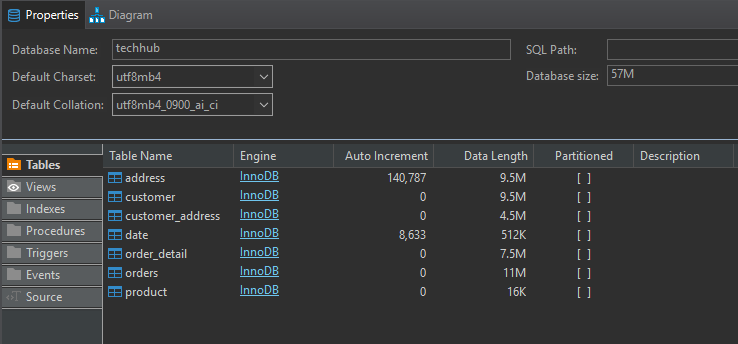

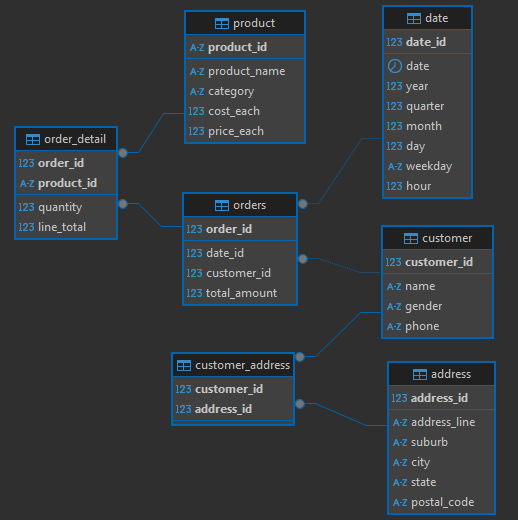

We can try running a few simple queries to check the database.

In [34]:
# Select the first 5 rows of orders
query = """
SELECT * 
FROM orders
LIMIT 5
"""

# Execute query and store result in a DataFrame
order_head = pd.read_sql(query, con=engine)

# Display result
order_head

,order_id,date_id,customer_id,total_amount
0,141234,509,996729,1050.00
1,141235,641,187530,22.42
2,141236,381,728417,35.97
3,141237,110,113912,224.99
4,141238,567,693628,17.98


In [35]:
# Calculate revenue by month
query = """
SELECT d.month, ROUND(SUM(o.total_amount), 2) AS total_sales
FROM orders o
JOIN date d ON o.date_id = d.date_id
GROUP BY d.month
ORDER BY d.month;
"""

# Execute query and store result in a DataFrame
sales_by_month = pd.read_sql(query, con=engine)

# Display result
sales_by_month

,month,total_sales
0,1,2733375.99
1,2,3303022.11
2,3,4210635.52
3,4,5085987.59
4,5,4728894.30
5,6,3866690.86
6,7,3971649.66
7,8,3366690.72
8,9,3146328.72
9,10,5605070.10


The data is now ready for SQL queries and can be integrated with BI tools, facilitating effective sales analysis, customer segmentation, and visualization.